In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [17]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [45]:
chirps = df[['Chirps/Second']]
ground = df[['Ground Temperature']]
linreg = linear_model.LinearRegression()
linreg.fit(chirps, ground)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# print intercept and coefficients
print('Intercept:', linreg.intercept_)
print('Coefficient:', linreg.coef_)

# calculate the R-squared
print('R-squared:', linreg.score(chirps, ground))

Intercept: [ 22.84898231]
Coefficient: [[ 3.410323]]
R-squared: 0.692294652915


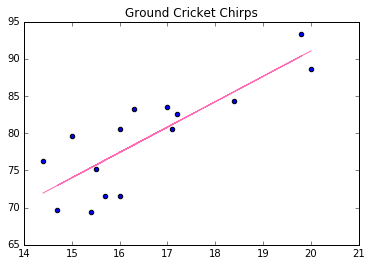

In [47]:
plt.scatter(chirps, ground)
plt.plot(chirps, linreg.predict(chirps), c='hotpink')
plt.title('Ground Cricket Chirps')
plt.show()

### Linear Regression Equation: y = 3.4x + 22.8
#### Extrapolate >>> at 95dF -> 21 chirps/second

In [48]:
(95 - 22.8)/3.4

21.23529411764706

#### Interpolate >>> at 18 chirps/second -> 84dF

In [49]:
linreg.predict([[18]])

array([[ 84.2347963]])

### Notes
While the r-score is not above .8, it is relatively close and provides a not great view of the relationship between ground temperature and chirps/second.  I would look for more data (increase sample size) to confirm the relationship, but as it stands I would not use this to suggest their is a correlation.  

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [61]:
bvb = pd.read_fwf("brain_body.txt")

In [64]:
brain = bvb[["Brain"]]
body = bvb[["Body"]]

In [65]:
regr = linear_model.LinearRegression()
regr.fit(brain, body)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# print intercept and coefficients
print('Intercept:', regr.intercept_)
print('Coefficient:', regr.coef_)

# calculate the R-squared
print('R-squared:', regr.score(chirps, ground))

Intercept: [ 91.00439621]
Coefficient: [[ 0.96649637]]
R-squared: -16.306115989


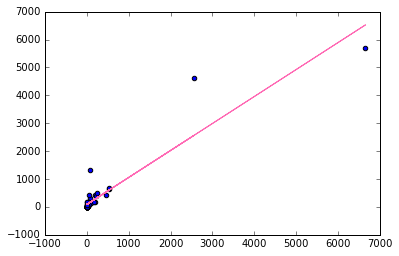

In [68]:
plt.scatter(brain, body)
plt.plot(brain, regr.predict(brain), c='hotpink')
plt.show()

### Notes
According to the wildly negative r-score, this is not a great method to model the relatinship between brain and body weight.  

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [69]:
salarydata = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [137]:
demos = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
demo = salarydata[demos]
salary = salarydata[['Salary']]

In [138]:
slinreg = linear_model.LinearRegression()
slinreg.fit(demo, salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
# print intercept and coefficients
print('Intercept:', slinreg.intercept_)
print('Coefficient:', slinreg.coef_)

# calculate the R-squared
print('R-squared:', slinreg.score(demo, salary))

Intercept: [ 11410.14654726]
Coefficient: [[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
   -128.79057354]]
R-squared: 0.854718067441


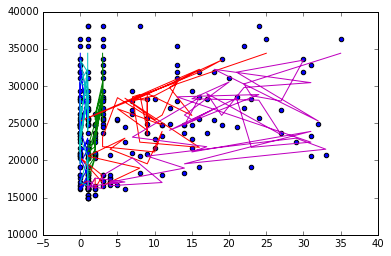

In [140]:
fig = plt.subplots()
for column in demos:
    plt.scatter(salarydata[column], salary)
plt.plot(demo, slinreg.predict(demo))

### Graph Notes
Use this information to correctly predict the winner of next year's Kentucky Derby.

In [141]:
combinations = []
for x in range(1, 6):
    combinations.append(itertools.combinations(demos, x))

In [142]:
best_score = 0
for item in combinations:
    for group in item:
        group = list(group)
        x = salarydata[group]
        salary_linreg = linear_model.LinearRegression()
        salary_linreg.fit(x, salary)
        if best_score < salary_linreg.score(x, salary):
            best_score = salary_linreg.score(x, salary)
            max_group = group
print(max_group, best_score)

['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] 0.854718067441


### Notes
By finding the r^2 score for each combination of demographics data, I found that a combination of all demographics was the strongest indicator of salary.  That seems fishy, and it does not graph well (see above). Sample size may be an issue. 